In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')

# Task 1

### Watts-Strogatz Graph

In [4]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
wsg3 = nx.watts_strogatz_graph(n=1000, k=10, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=10, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=10, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=10, p=0.01)

In [14]:
def giant_when_removing(graph):
    """Returns the sizes of biggest subgraphs for each fraction of removed nodes
    Fractions start at 0.5 and go to ca. 0.97 (it's amount of nodes divided by elements from fractions array)"""
    giants = list()
    # Couldn't thnik of smarter solution
    fractions = np.array([2.0, 1.75, 1.5, 1.3, 1.2, 1.1, 1.05, 1.03])

    for f in fractions:
        print("fraction: " + str(f))
        x = np.random.choice(len(graph.nodes()), int(len(graph.nodes())/f), replace=False)
        # Only now I realise how ineffective this is. But "if it works, don't touch it" :P
        gc = graph.copy()
        gc.remove_nodes_from(x)
        giants.append(len(max(nx.connected_components(gc), key = len)))
    return giants

def giant_without_removing(graph):
    """This is basically len(graph.nodes())"""
    return len(max(nx.connected_components(graph), key = len))

In [5]:
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])
gs

1
2
3


[[0.372, 0.178, 0.055, 0.016, 0.014, 0.005, 0.002, 0.002],
 [0.4126, 0.1181, 0.0132, 0.0026, 0.0015, 0.0008, 0.0005, 0.0005],
 [0.39447, 0.11942, 0.00174, 0.00038, 0.0002, 0.00013, 6e-05, 6e-05],
 [0.398331, 0.147062, 0.00045, 7.5e-05, 2.7e-05, 1.4e-05, 9e-06, 6e-06]]

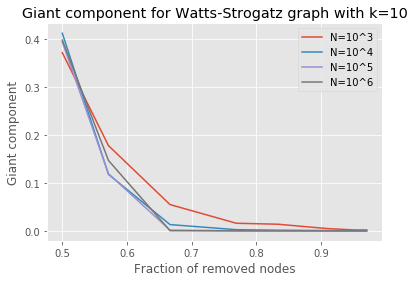

In [6]:
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

In [10]:
# Redeclare for k=20
wsg3 = nx.watts_strogatz_graph(n=1000, k=20, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=20, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=20, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=20, p=0.01)

In [13]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])

fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03
fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03
fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03
fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03


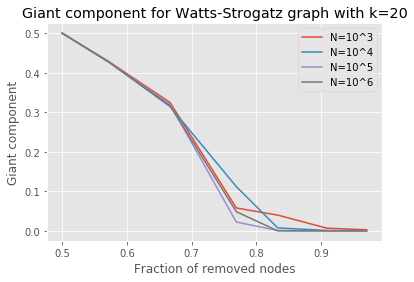

In [15]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

In [16]:
# Redeclare for k=30
wsg3 = nx.watts_strogatz_graph(n=1000, k=30, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=30, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=30, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=30, p=0.01)

In [17]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])

fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03
fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03
fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03
fraction: 2.0
fraction: 1.75
fraction: 1.5
fraction: 1.3
fraction: 1.2
fraction: 1.1
fraction: 1.05
fraction: 1.03


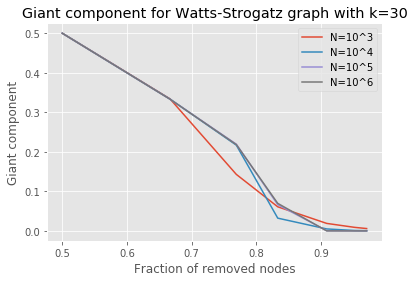

In [19]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

### Random Graph

In [ ]:
# k=10
er3 = nx.fast_gnp_random_graph(n=1000, p=10/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=10/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=10/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=10/(1000000-1))

In [36]:
def mean_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    return sum(degrees)/float(len(degrees))

print(mean_degree(er3))
print(mean_degree(er4))
print(mean_degree(er5))
print(mean_degree(er6))

9.84
10.0158
9.99738
99.992862


In [ ]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(er3) for x in giant_when_removing(er3)])
gs.append([x/giant_without_removing(er4) for x in giant_when_removing(er4)])
gs.append([x/giant_without_removing(er5) for x in giant_when_removing(er5)])
gs.append([x/giant_without_removing(er6) for x in giant_when_removing(er6)])

In [ ]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for random graph with k~10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

In [ ]:
# k=20
er3 = nx.fast_gnp_random_graph(n=1000, p=20/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=20/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=20/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=20/(1000000-1))
print(mean_degree(er3))

In [ ]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(er3) for x in giant_when_removing(er3)])
gs.append([x/giant_without_removing(er4) for x in giant_when_removing(er4)])
gs.append([x/giant_without_removing(er5) for x in giant_when_removing(er5)])
gs.append([x/giant_without_removing(er6) for x in giant_when_removing(er6)])

In [ ]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for random graph with k~20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

In [ ]:
# k=30
er3 = nx.fast_gnp_random_graph(n=1000, p=30/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=30/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=30/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=30/(1000000-1))
print(mean_degree(er3))

In [ ]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(er3) for x in giant_when_removing(er3)])
gs.append([x/giant_without_removing(er4) for x in giant_when_removing(er4)])
gs.append([x/giant_without_removing(er5) for x in giant_when_removing(er5)])
gs.append([x/giant_without_removing(er6) for x in giant_when_removing(er6)])

In [ ]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for random graph with k~30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

### Barabasi-Albert graph

In [ ]:
# k=10
ba3 = nx.barabasi_albert_graph(n=1000,m=5)
ba4 = nx.barabasi_albert_graph(n=10000,m=5)
ba5 = nx.barabasi_albert_graph(n=100000,m=5)
ba6 = nx.barabasi_albert_graph(n=1000000,m=5)
print(mean_degree(ba3))

In [ ]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(ba3) for x in giant_when_removing(ba3)])
gs.append([x/giant_without_removing(ba4) for x in giant_when_removing(ba4)])
gs.append([x/giant_without_removing(ba5) for x in giant_when_removing(ba5)])
gs.append([x/giant_without_removing(ba6) for x in giant_when_removing(ba6)])

In [ ]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for Barabasi-Albert graph with k~10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

In [ ]:
# k=20
ba3 = nx.barabasi_albert_graph(n=1000,m=10)
ba4 = nx.barabasi_albert_graph(n=10000,m=10)
ba5 = nx.barabasi_albert_graph(n=100000,m=10)
ba6 = nx.barabasi_albert_graph(n=1000000,m=10)
print(mean_degree(ba3))

In [ ]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(ba3) for x in giant_when_removing(ba3)])
gs.append([x/giant_without_removing(ba4) for x in giant_when_removing(ba4)])
gs.append([x/giant_without_removing(ba5) for x in giant_when_removing(ba5)])
gs.append([x/giant_without_removing(ba6) for x in giant_when_removing(ba6)])

In [ ]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for Barabasi-Albert graph with k~20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

In [ ]:
# k=30
ba3 = nx.barabasi_albert_graph(n=1000,m=15)
ba4 = nx.barabasi_albert_graph(n=10000,m=15)
ba5 = nx.barabasi_albert_graph(n=100000,m=15)
ba6 = nx.barabasi_albert_graph(n=1000000,m=15)
print(mean_degree(ba3))

In [ ]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(ba3) for x in giant_when_removing(ba3)])
gs.append([x/giant_without_removing(ba4) for x in giant_when_removing(ba4)])
gs.append([x/giant_without_removing(ba5) for x in giant_when_removing(ba5)])
gs.append([x/giant_without_removing(ba6) for x in giant_when_removing(ba6)])

In [ ]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
plt.plot(fractions, gs[3])
plt.title("Giant component for Barabasi-Albert graph with k~30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.show()

# Task 2

In [ ]:
# Posortowana lista wierzchołków
sg = [x[0] for x in sorted(GRAPH.degree, key=lambda x: x[1], reverse=True)]
# Teraz usuń z grafu fraction